# Multiple Classification

In this exercise, will train a custome neural networks model that will accurately predict a sort of beer based on some evaluation criterias such as look, aroma, palate or flavor. We will be woking on the dataset: https://drive.google.com/file/d/1vYyJL_IB6KjKCxuk9kg4vIMPGTtoX8Ek/view


The steps are:
1. Setup Repository
2. Load and Explore data
3. Prepare Data
4. Train Model
5. Evaluation
6. Push Changes

In [1]:
import pandas as pd
import numpy as np
import joblib

## 1. Setup Repository

**[1.1]** Go to the folder I created previously `adv_dsi_ass_2`

In [2]:
cd /Users/frodo/Downloads/36114/project/adv_dsi_2023/adv_dsi_ass_2/ass_2

/Users/frodo/Downloads/36114/project/adv_dsi_2023/adv_dsi_ass_2/ass_2


**[1.2]** Copy the cookiecutter data science template

In [ ]:
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

**[1.3]** Create a file called `Dockerfile` and add the following content:

In [ ]:
touch Dockerfile

In [ ]:
FROM jupyter/scipy-notebook:python-3.8.13
RUN pip install torch torchvision torchtext --extra-index-url https://download.pytorch.org/whl/cpu
ENV PYTHONPATH "${PYTHONPATH}:/home/jovyan/work"
WORKDIR /home/jovyan/work

**[1.4]** Build the image from this Dockerfile

In [ ]:
docker build -t pytorch-notebook:latest .

**[1.5]** Run the built Docker image

In [ ]:
docker run  -dit --rm --name adv_dsi_2023 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/adv_dsi_2023/adv_dsi_ass_2:/home/jovyan/work -v ~/Projects/adv_dsi_2023/src:/home/jovyan/work/src pytorch-notebook:latest 

**[1.6]** Display last 50 lines of logs

In [ ]:
docker logs --tail 50 adv_dsi_ass_2

**[1.7]** Initialise the repo

In [ ]:
git init

**[1.8]** In the local repo `adv_dsi_ass_2`,

In [ ]:
# Solution
git remote add origin git@github.com:frodorocky/adv_dsi_ass_2.git

**[1.9]** Add changes to git staging area and commit them

In [ ]:
# Solution
git add .
git commit -m "init"

**[1.10]** Push master branch to origin

In [ ]:
git push --set-upstream origin master

**[1.11]** Create a new git branch called `pytorch_reg`

In [ ]:
git checkout -b pytorch_reg

## 2. Load and explore data

We will do data cleaning and data exploration simultaneously because data exploration often goes hand in hand with data cleaning processes in our experiment

**[2.1]** Load the data in a dataframe called `df`

In [2]:
df = pd.read_csv('../data/raw/beer_reviews.csv')

**[2.2]** Display the first 5 rows of df

In [4]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


**[2.3]** Display the shape of train data

In [5]:
df.shape

(1586614, 13)

**[2.4]** Display the summary (info) of df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


**[2.5]** Display the ratio of missing values

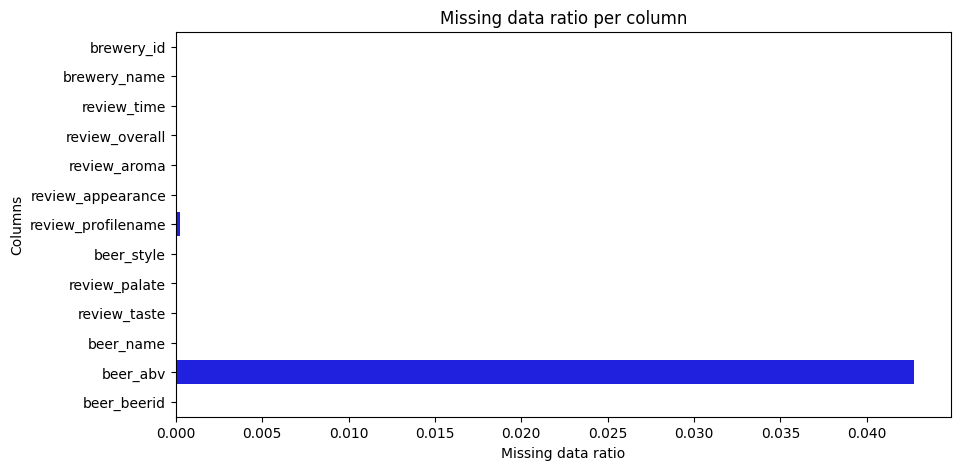

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg') 
%matplotlib inline

# Calculate the ratio of missing data for each column
missing_data_ratio = df.isnull().sum() / len(df)

# Convert the result into a DataFrame
missing_data_df = pd.DataFrame({'column_name': df.columns,
                                'missing_data_ratio': missing_data_ratio})

# Plot the graph
plt.figure(figsize=(10,5))
sns.barplot(x='missing_data_ratio', y='column_name', data=missing_data_df, color='blue')
plt.title('Missing data ratio per column')
plt.xlabel('Missing data ratio')
plt.ylabel('Columns')
plt.show()

**[2.6]** Display the descriptive statistics of df

In [8]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


**[2.7]** Distribution of Y

In [9]:
df.beer_style.value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

**[2.8]** Distribution of X

In [73]:
for column in df.columns:
    print(f"\nFeature: {column}")
    if df[column].dtype in ['int64', 'float64']:
        print(df[column].describe())
    else:
        print(df[column].value_counts())


Feature: brewery_id
count    1.586614e+06
mean     3.130099e+03
std      5.578104e+03
min      1.000000e+00
25%      1.430000e+02
50%      4.290000e+02
75%      2.372000e+03
max      2.800300e+04
Name: brewery_id, dtype: float64

Feature: brewery_name
Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
                                      ...  
Brauerei Stolz GmbH & Co. KG              1
Hausbrauerei Düll                         1
Browar Grybów                             1
Staro&#269;eský Pivovárek Dobruka        1
Spire Brewery                             1
Name: brewery_name, Length: 5742, dtype: int64

Feature: review_time
count    1.586614e+06
mean     1.224089e+09
std      7.654427e+07
min      8.406720e+08
25%      1.173224e+09
50%      1.239203e+09
75%      1.288568e+09
max      1.326285e+09
Name: review_time,

## 3. Prepare data

**[3.1]** Create a copy of `df` and save it into a variable called `df_cleaned`

In [3]:
df_cleaned = df.copy()

**[3.2]** extract year and month from a timestamp

In [4]:
# transform review_time into datetime
df_cleaned['review_time'] = pd.to_datetime(df_cleaned['review_time'], unit='s')

# create review_year and review_month
df_cleaned['review_year'] = df_cleaned['review_time'].dt.year
df_cleaned['review_month'] = df_cleaned['review_time'].dt.month

**[3.3]** Define id and drop irrelevant variables

In [5]:
df_cleaned = df_cleaned.set_index(['beer_beerid','beer_name','review_time'])

In [6]:
df_cleaned = df_cleaned.drop(axis=1, columns=['brewery_id'])

**[3.4]** Dealing missing value

In [7]:
df_cleaned = df_cleaned.dropna()

**[3.5]** Extract the target variable into a variable called y

In [8]:
y = df_cleaned.pop('beer_style')

**[3.6]** Mapping labels to numbers

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
# create a label mapping dict and store for inference model serving
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
joblib.dump(label_mapping, '../models/label_map')

['../models/label_map']

**[3.7]** split dataset

In [11]:
from sklearn.model_selection import train_test_split

# Convert DataFrames/Series to numpy arrays before splitting
X_trainval, X_test, y_trainval, y_test = train_test_split(df_cleaned, y_encoded, test_size=0.2, stratify=y,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval,random_state=42) 

**[3.8]** Define customer dataset

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [14]:
class MyDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __getitem__(self, index):

        single_data = torch.from_numpy(self.data[index].todense()).float()
        single_target = torch.tensor(self.target[index]).long()
        return single_data, single_target

    def __len__(self):
        return self.data.shape[0]

**[3.9]** Define preprocessor to deal with numeric features and categorical features

In [15]:
num_cols = df_cleaned.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
cat_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

In [16]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [38]:
type(X_test)

pandas.core.frame.DataFrame

**[3.10]** Transform dataset

In [17]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

In [27]:
# save preprocessor for inferencing
joblib.dump(preprocessor, '../models/preprocessor')

['../models/preprocessor']

**[3.11]** # Ensure validation and test sets have the same number of columns as the training set

In [18]:
# get OneHotEncoder from the fitted preprocessor
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot'] 

# Get feature names from the OneHotEncoder
feature_names = ohe.get_feature_names_out(input_features=cat_cols)  

# Get the number of columns in the training data
num_cols_train = len(feature_names)  

if X_val_preprocessed.shape[1] < num_cols_train:
    # Add zero columns for any missing features in the validation data
    X_val_preprocessed = np.hstack([X_val_preprocessed, np.zeros((X_val_preprocessed.shape[0], num_cols_train - X_val_preprocessed.shape[1]))])

if X_test_preprocessed.shape[1] < num_cols_train:
    # Add zero columns for any missing features in the test data
    X_test_preprocessed = np.hstack([X_test_preprocessed, np.zeros((X_test_preprocessed.shape[0], num_cols_train - X_test_preprocessed.shape[1]))])


**[3.12]** Dataset Load

In [19]:
train_dataset = MyDataset(X_train_preprocessed, y_train)
val_dataset = MyDataset(X_val_preprocessed, y_val)
test_dataset = MyDataset(X_test_preprocessed, y_test)

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## 4. Train model

**[4.1]** Initialize hyperparameter

In [21]:
import torch
from torch import nn
from torch.optim import Adam

# set hyperparameter
input_size = X_train_preprocessed.shape[1]  
hidden_size = 64  
num_classes = len(np.unique(y_train))  
num_epochs = 50  
learning_rate = 0.01  

**[4.2]** define model

In [22]:
# define model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = out.squeeze()
        return out

**[4.3]** define loss function and optimizer

In [23]:
# create model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device) 

model = MLP(input_size, hidden_size, num_classes).to(device)
print(next(model.parameters()).device)  

cpu
cpu


**[4.3]** define loss function and optimizer

In [24]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**[4.4]** train model

In [64]:
best_loss = float('inf')

# train model
for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader):
        features = features.float()
        labels = labels.long()
        
        features = features.to(device)
        labels = labels.to(device)
 
        
        # Forward Propagation
        outputs = model(features)
        loss = criterion(outputs, labels)

        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        
    # validation
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for i, (features, labels) in enumerate(val_loader):
            features = features.float()
            labels = labels.long()
            
        
            features = features.to(device)
            labels = labels.to(device)


            outputs = model(features)
            loss = criterion(outputs, labels)
      
            
            val_loss += loss.item()
        val_loss /= len(val_loader)

    # save best model
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'models/best_model.pth')

    print('Epoch [{}/{}], Loss: {:.4f}, Val Loss: {:.4f}'
          .format(epoch+1, num_epochs, loss.item(), val_loss))

Epoch [1/50], Loss: 2.1578, Val Loss: 2.0579
Epoch [2/50], Loss: 1.7006, Val Loss: 1.7461
Epoch [3/50], Loss: 1.6885, Val Loss: 1.6479
Epoch [4/50], Loss: 1.5789, Val Loss: 1.5517
Epoch [5/50], Loss: 1.2885, Val Loss: 1.5685
Epoch [6/50], Loss: 1.3619, Val Loss: 1.5216
Epoch [7/50], Loss: 1.3805, Val Loss: 1.5300
Epoch [8/50], Loss: 1.6368, Val Loss: 1.4393
Epoch [9/50], Loss: 1.4207, Val Loss: 1.5402
Epoch [10/50], Loss: 0.9896, Val Loss: 1.4945
Epoch [11/50], Loss: 1.0957, Val Loss: 1.4146
Epoch [12/50], Loss: 1.3145, Val Loss: 1.4302
Epoch [13/50], Loss: 1.1726, Val Loss: 1.3672
Epoch [14/50], Loss: 1.1476, Val Loss: 1.4022
Epoch [15/50], Loss: 1.0758, Val Loss: 1.3844
Epoch [16/50], Loss: 1.1661, Val Loss: 1.4336
Epoch [17/50], Loss: 0.9476, Val Loss: 1.3615
Epoch [18/50], Loss: 1.0014, Val Loss: 1.4144
Epoch [19/50], Loss: 1.2444, Val Loss: 1.4805
Epoch [20/50], Loss: 1.0743, Val Loss: 1.3970
Epoch [21/50], Loss: 1.2629, Val Loss: 1.3802
Epoch [22/50], Loss: 1.1414, Val Loss: 1.33

## 5. Evaluation on test data

**[5.1]** we applied the trained model on test data to obtain model performance 

In [67]:
from sklearn.metrics import classification_report
import numpy as np

# load best model
model.load_state_dict(torch.load('models/best_model.pth',map_location=device))

# predict and ground truth
y_pred = []
y_true = []

with torch.no_grad():
    for features, labels in test_loader:
        features = features.float()
        labels = labels.long()
        
        features = features.to(device)
        labels = labels.to(device)

        # prediction
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)

        y_pred.extend(predicted.cpu().numpy().tolist())
        y_true.extend(labels.cpu().numpy().tolist())

**[5.2]** Evaluation

In [68]:
# compute recision, recall, and f1 score
print(classification_report(y_true, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.62      0.47      0.54      1444
           1       0.79      0.78      0.78      5793
           2       0.51      0.43      0.47      8346
           3       0.47      0.58      0.52      1722
           4       0.55      0.77      0.64      5253
           5       0.55      0.29      0.38      2232
           6       0.41      0.24      0.30      2160
           7       0.54      0.47      0.50      4826
           8       0.50      0.05      0.08       239
           9       0.67      0.74      0.70     17021
          10       0.48      0.38      0.43      1079
          11       0.54      0.84      0.66     10027
          12       0.69      0.86      0.77     22629
          13       0.83      0.68      0.74       766
          14       0.46      0.65      0.54     11614
          15       0.29      0.57      0.39      1673
          16       0.47      0.38      0.42      4578
          17       0.62    

## 6. Push changes

**[6.1]** Add the changes to git staging area

In [ ]:
git add .

**[6.2]** Create the snapshot of the repository and add a description

In [ ]:
git commit -m "MLP"

**[6.3]** Push snapshot to Github

In [ ]:
git push --set-upstream origin main

**[6.4]** Check out to the branch

In [ ]:
git checkout main

**[6.5]** Pull the latest updates

In [ ]:
git pull

**[6.6]** Stop the Docker container

In [ ]:
docker stop adv_dsi_ass_2

## Reference

So, A. (2023). 36114_AdvDSI_Lab3_Exercise3_Solutions. https://drive.google.com/file/d/17UpMxkj4slAQ2BDyAeNEYzUfTA9Ww3x6/view